importing the dependecies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Preprocessing

In [3]:
# loading data file from csv file to pandas dataframe
car_price_dataset = pd.read_csv('car data.csv')

In [4]:
# inspecting the first 5 rows in dataset
car_price_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# number of rows and column 
car_price_dataset.shape

(301, 9)

In [6]:
# information about dataset
car_price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# checking the number of missingvalues in dataset
car_price_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# cheking the distribution of categorical data
print(car_price_dataset.Fuel_Type.value_counts())
print(car_price_dataset.Seller_Type.value_counts())
print(car_price_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the Categorical Data

In [9]:
# encoding "Fuel_Type" Column
car_price_dataset.replace({"Fuel_Type":{'Petrol':0, 'Diesel':1,'CNG':2}},inplace=True)

In [10]:
# encoding "Seller_Type" Column
car_price_dataset.replace({"Seller_Type":{'Dealer':0, 'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_price_dataset.replace({"Transmission":{'Manual':0, 'Automatic':1}},inplace=True)

In [11]:
car_price_dataset.head

<bound method NDFrame.head of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0       ritz  2014           3.35           5.59       27000          0   
1        sx4  2013           4.75           9.54       43000          1   
2       ciaz  2017           7.25           9.85        6900          0   
3    wagon r  2011           2.85           4.15        5200          0   
4      swift  2014           4.60           6.87       42450          1   
..       ...   ...            ...            ...         ...        ...   
296     city  2016           9.50          11.60       33988          1   
297     brio  2015           4.00           5.90       60000          0   
298     city  2009           3.35          11.00       87934          0   
299     city  2017          11.50          12.50        9000          1   
300     brio  2016           5.30           5.90        5464          0   

     Seller_Type  Transmission  Owner  
0              0             

Spilitting the data and target

In [12]:
X = car_price_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_price_dataset['Selling_Price']

In [13]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Train and Test Data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

Model Training

1. Linear Regression 

In [15]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [16]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluate

In [17]:
# Prediction on Training Data
training_data_prediction = lin_reg_model.predict(X_train)

In [18]:
# R Squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R_Squared_Error : ",error_score)

R_Squared_Error :  0.8799451660493708


Visualize actual and predicted price

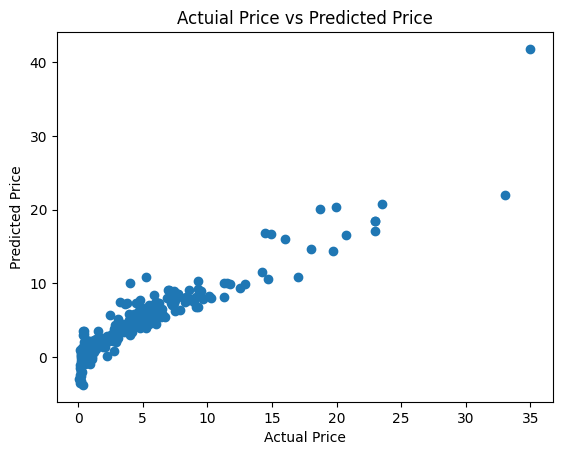

In [19]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actuial Price vs Predicted Price")
plt.show()

In [21]:
# Prediction on Test Data
test_data_prediction = lin_reg_model.predict(X_test)

In [22]:
# R Squared Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R_Squared_Error : ",error_score)

R_Squared_Error :  0.8365766715026374


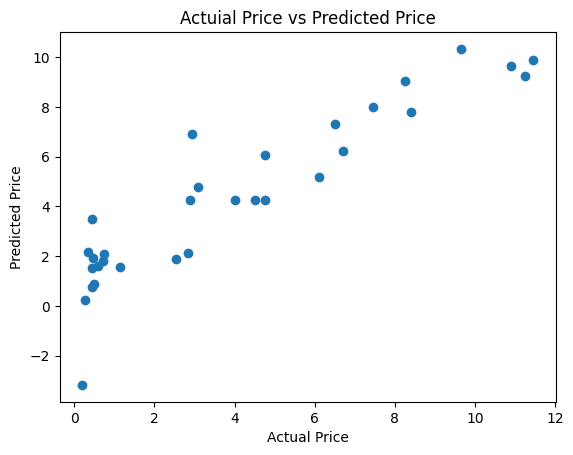

In [23]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actuial Price vs Predicted Price")
plt.show()

2. Lasso Regression

In [24]:
# loading the linear regression model
lass_reg_model = Lasso()

In [25]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [27]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [28]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


Visualize the actual prices and Predicted prices


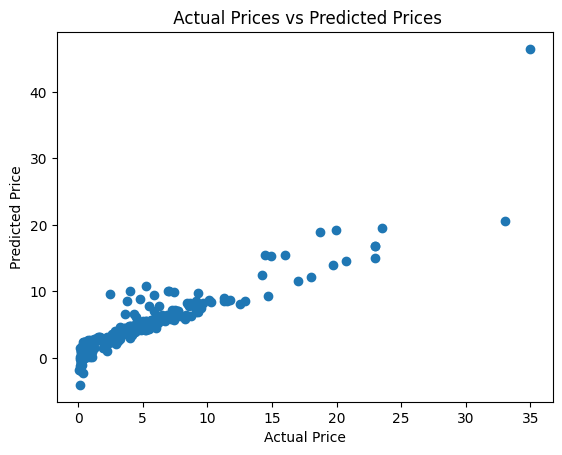

In [29]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [30]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [31]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


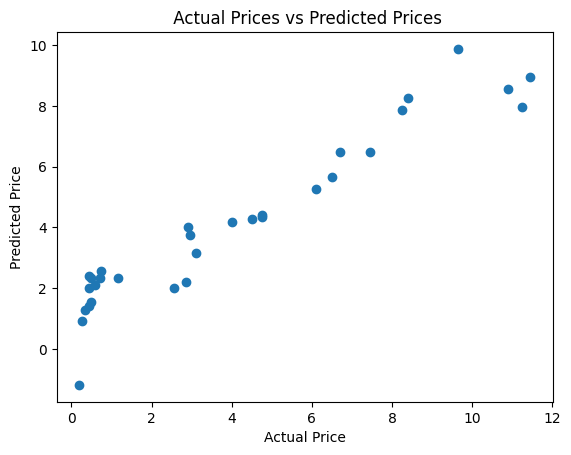

In [32]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Predicitve Model

In [35]:
# Create a new input data as a Pandas DataFrame with the same column names
input_data = pd.DataFrame({
    'Year': [2014],  # Provide values for all the features
    'Present_Price': [5.59],
    'Kms_Driven': [27000],
    'Fuel_Type': [0],  # 1 for Diesel, 0 for Petrol, 2 for CNG
    'Seller_Type': [0],  # 0 for Dealer, 1 for Individual
    'Transmission': [0],  # 0 for Manual, 1 for Automatic
    'Owner': [0]
})

# Use the trained Linear Regression model to make predictions
linear_regression_prediction = lin_reg_model.predict(input_data)
print("Linear Regression Car Price Prediction:", linear_regression_prediction[0])

# Use the trained Lasso Regression model to make predictions
lasso_regression_prediction = lass_reg_model.predict(input_data)
print("Lasso Regression Car Price Prediction:", lasso_regression_prediction[0])


Linear Regression Car Price Prediction: 3.8390135356471546
Lasso Regression Car Price Prediction: 3.825730602341082
